In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('../generated_memory_data_test_2.csv')
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date')

,mem_used,mem_specs,date
0,1.000000,16777216.0,2023-07-25 00:03:06.466
1,0.862886,16777216.0,2023-07-25 00:08:06.466
2,0.682798,16777216.0,2023-07-25 00:13:06.466
3,0.959150,16777216.0,2023-07-25 00:18:06.466
4,1.000000,16777216.0,2023-07-25 00:23:06.466
...,...,...,...
17851,0.066638,16777216.0,2023-09-24 23:38:08.122
17852,0.228046,16777216.0,2023-09-24 23:43:08.122
17853,0.637319,16777216.0,2023-09-24 23:48:08.122
17854,0.351833,16777216.0,2023-09-24 23:53:08.122


In [16]:
df

,mem_used,mem_specs,date
0,1.000000,16777216.0,2023-07-25 00:03:06.466
1,0.862886,16777216.0,2023-07-25 00:08:06.466
2,0.682798,16777216.0,2023-07-25 00:13:06.466
3,0.959150,16777216.0,2023-07-25 00:18:06.466
4,1.000000,16777216.0,2023-07-25 00:23:06.466
...,...,...,...
17851,0.066638,16777216.0,2023-09-24 23:38:08.122
17852,0.228046,16777216.0,2023-09-24 23:43:08.122
17853,0.637319,16777216.0,2023-09-24 23:48:08.122
17854,0.351833,16777216.0,2023-09-24 23:53:08.122


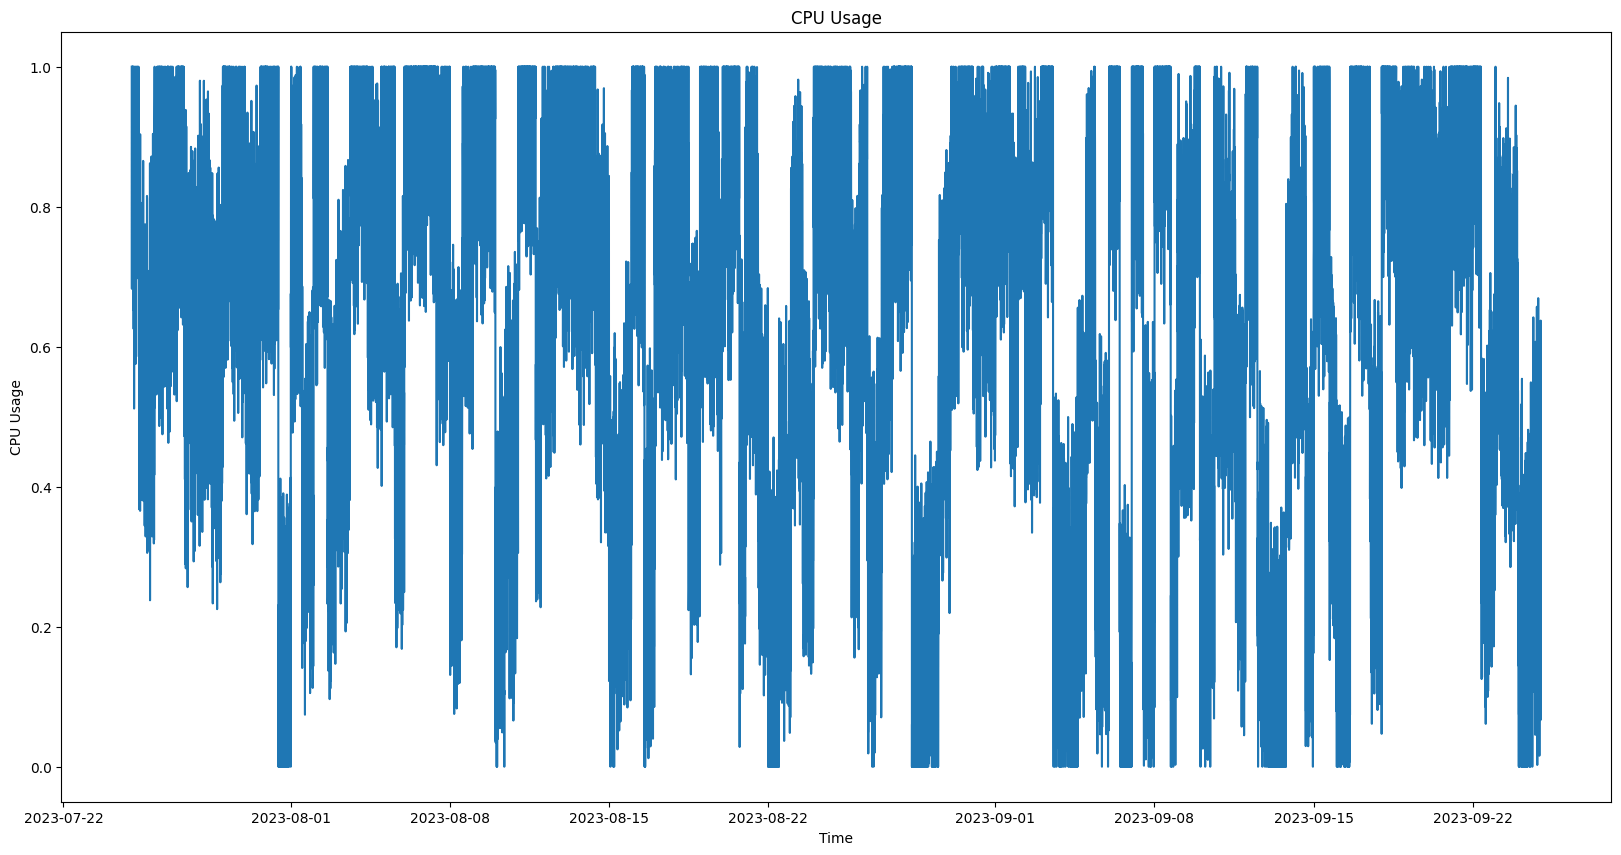

In [6]:
#plot data
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['mem_used'])
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


In [7]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

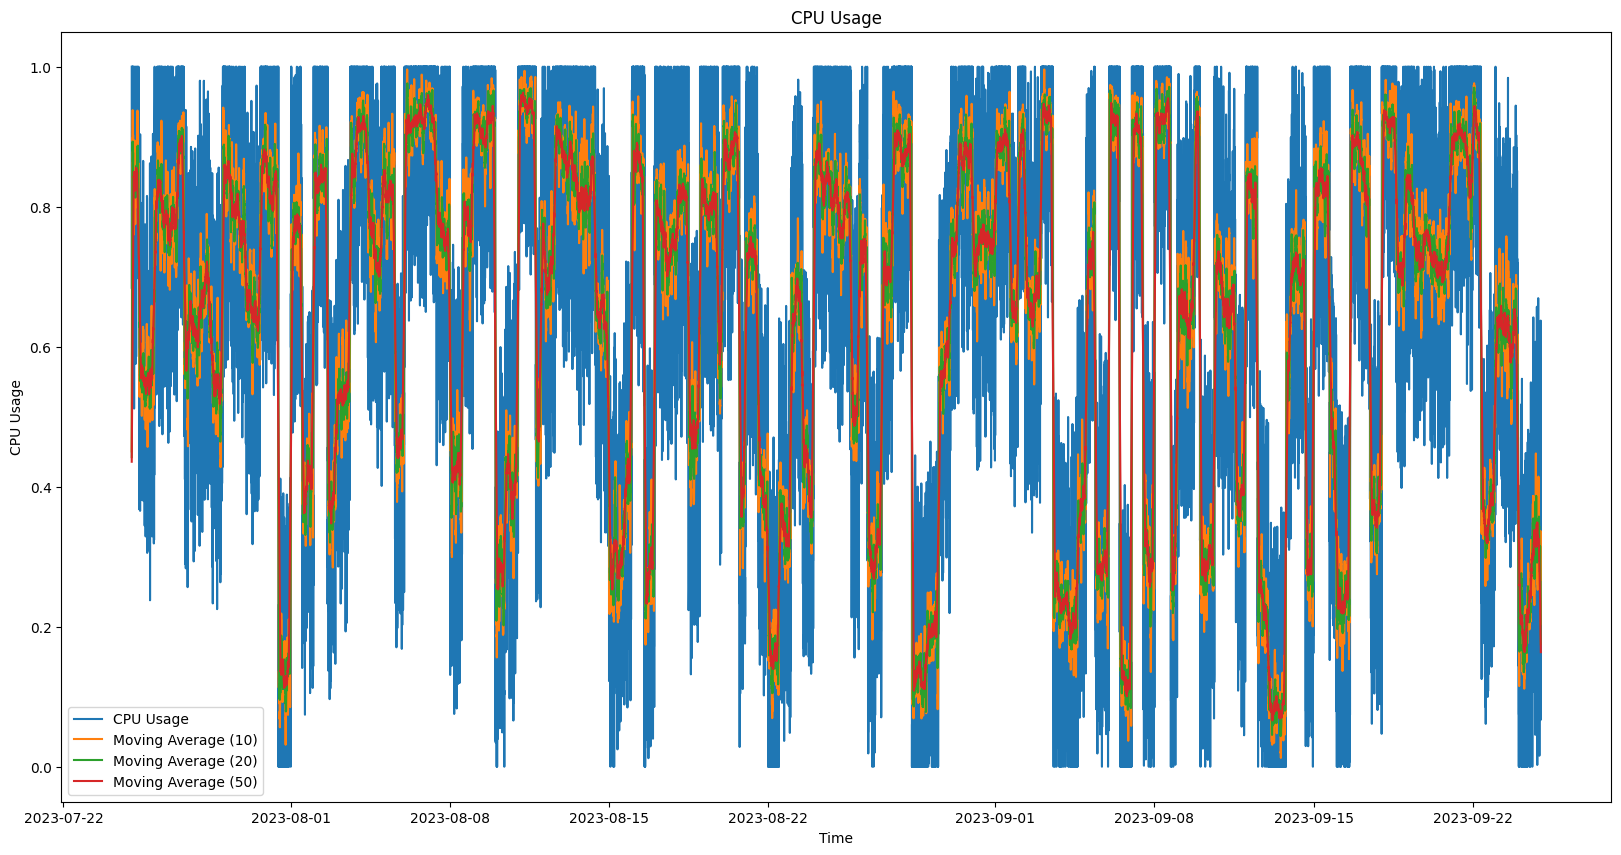

In [8]:
#plot moving average
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['mem_used'], label='CPU Usage')
plt.plot(df['date'], moving_average(df['mem_used'], 10), label='Moving Average (10)')
plt.plot(df['date'], moving_average(df['mem_used'], 20), label='Moving Average (20)')
plt.plot(df['date'], moving_average(df['mem_used'], 50), label='Moving Average (50)')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


In [9]:
#identify deviation
def identify_deviation(data, window_size, sigma):
    avg = moving_average(data, window_size).tolist()
    residual = data - avg
    std = np.std(residual)
    return np.where(residual > std*sigma, 1, 0)

In [10]:
#detect anomaly
def detect_anomaly(data, window_size, sigma):
    deviation = identify_deviation(data, window_size, sigma)
    index = np.where(deviation == 1)
    return index[0].tolist()


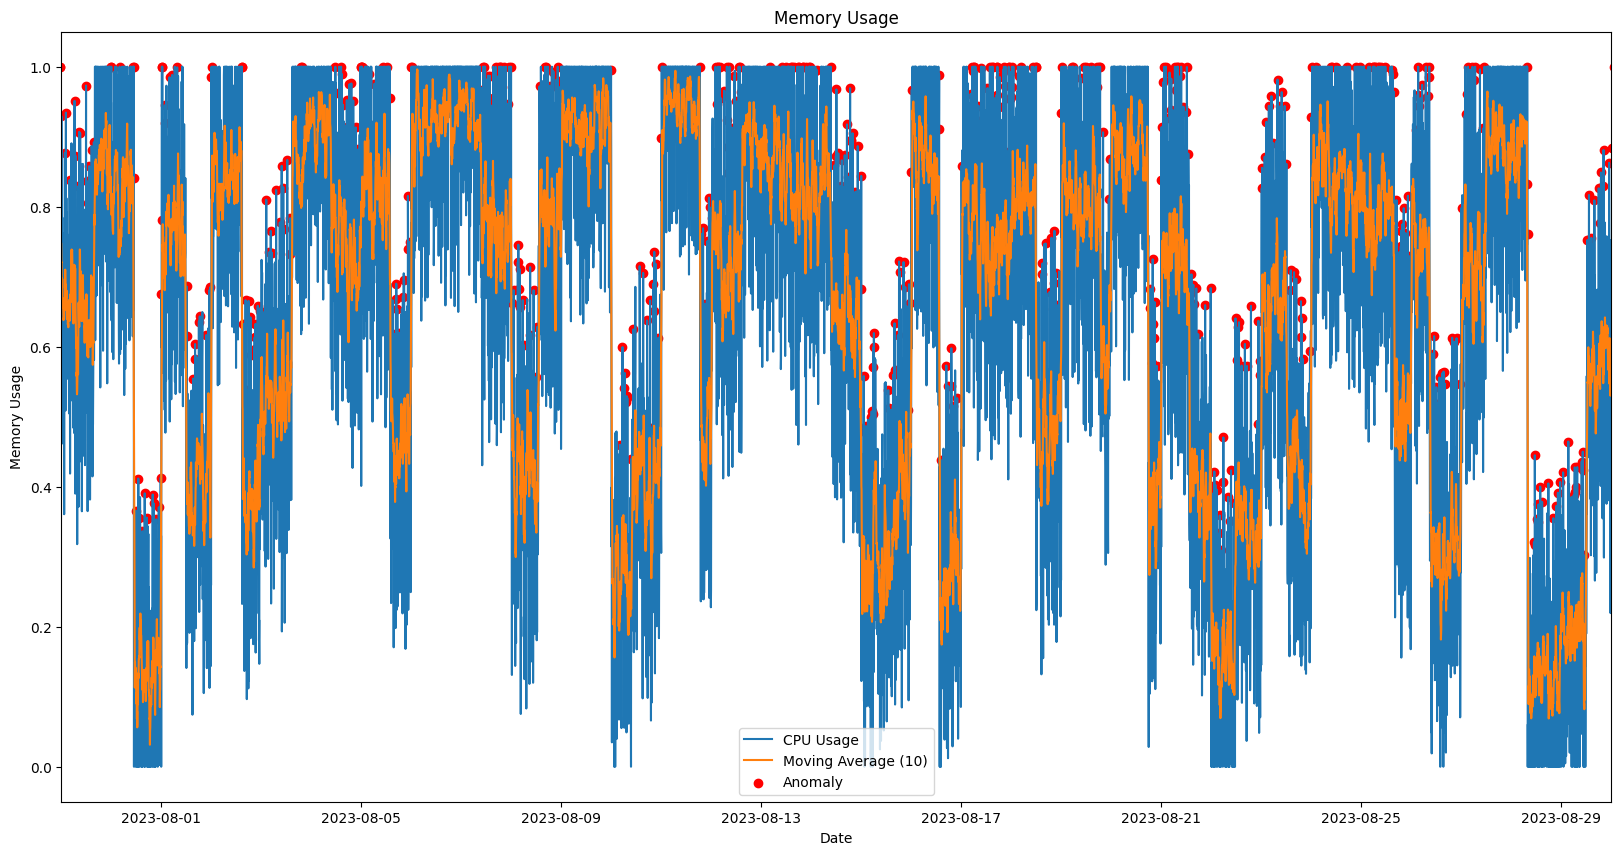

In [62]:
#plot anomaly with window size 50 and sigma 1.5
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['mem_used'], label='CPU Usage')
plt.plot(df['date'], moving_average(df['mem_used'], 10), label='Moving Average (10)')
plt.scatter(df['date'][detect_anomaly(df['mem_used'], 10, 1.5)], df['mem_used'][detect_anomaly(df['mem_used'], 10, 1.5)], label='Anomaly', color='red')
plt.title('Memory Usage')
plt.xlabel('Date')
plt.ylabel('Memory Usage')
plt.xlim(pd.Timestamp('2023-07-30'), pd.Timestamp('2023-08-30'))
# plt.xlim(pd.Timestamp('2023-07-25'), pd.Timestamp('2023-07-26'))
# plt.xlim(pd.Timestamp('2023-09-05'), pd.Timestamp('2023-09-07'))
plt.legend()
plt.show()


In [58]:
anomaly = detect_anomaly(df['mem_used'], 10, 1.5)
anomaly = np.array(anomaly)
len(anomaly), len(df)

(1134, 17856)

In [44]:
df['anomaly'] = 0
df['anomaly'][anomaly] = 1
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_26484\1424815448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly'][anomaly] = 1


,mem_used,mem_specs,date,anomaly
0,1.000000,16777216.0,2023-07-25 00:03:06.466,1
1,0.862886,16777216.0,2023-07-25 00:08:06.466,1
2,0.682798,16777216.0,2023-07-25 00:13:06.466,0
3,0.959150,16777216.0,2023-07-25 00:18:06.466,1
4,1.000000,16777216.0,2023-07-25 00:23:06.466,1


In [45]:
df.to_csv('../generated_mem_data_with_anomaly.csv', index=False)